## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [2]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
#import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

c:\users\valentin\anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


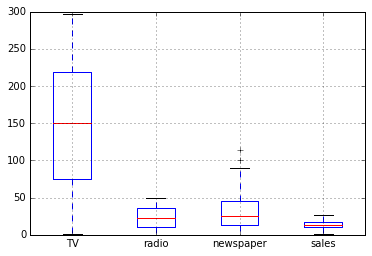

In [4]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

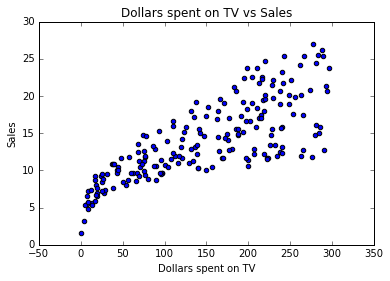

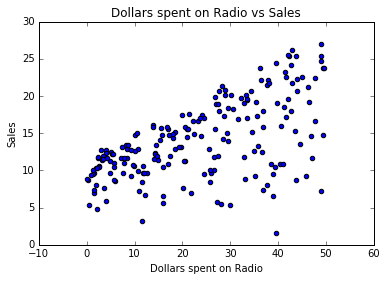

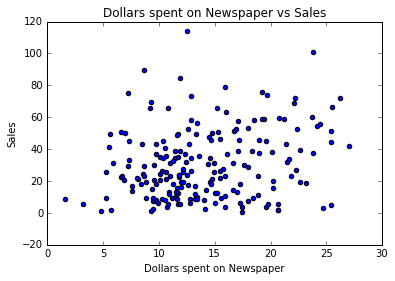

In [5]:
plt.figure()
plt.scatter(df['TV'],df['sales'])
plt.title('Dollars spent on TV vs Sales')
plt.ylabel('Sales')
plt.xlabel('Dollars spent on TV')

plt.figure()
plt.scatter(df['radio'],df['sales'])
plt.title('Dollars spent on Radio vs Sales')
plt.ylabel('Sales')
plt.xlabel('Dollars spent on Radio')

plt.figure()
plt.scatter(df['sales'],df['newspaper'])
plt.title('Dollars spent on Newspaper vs Sales')
plt.ylabel('Sales')
plt.xlabel('Dollars spent on Newspaper')

In [6]:
from pandas.tools.plotting import scatter_matrix 

Which of the variables seem correlated with one another? Which don't? Explain your answer

A strong linear relation is observed between the variable "Dollars spent on TV" and "Sales", when we increase the amount of dollars spent on TV there is an increase in sales.
Regarding the variables "Dollars spent on Radio" and "Sales", we can also observe a positive relationship. However, the points are scaterred in a wider band indicating a weaker relation compared to the two variables mentioned before.
Finally, the variables "Dollars spent on Newspaper" and "Sales" don't show any correlation since for any amount of money spent on Newspaper there is not any change on sales.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [7]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [8]:
y = df['sales']

b) Set X to be just the features described above in df

In [9]:
# Code here
X = df.iloc[:,:3]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


c) Randomly split data into training and testing - 80% training, 20% testing.

In [10]:
size = len(X)+1
pos = range(1,size)
nprnd.shuffle(pos)
rnd_X = X.loc[pos]
rnd_y = y.loc[pos]

Xtrain = rnd_X[0:int(size*0.8)]
Xtest = rnd_X[int(size*0.8):]

ytrain = rnd_y[0:int(size*0.8)]
ytest = rnd_y[int(size*0.8):]

d) Train model on training data, and make predictions on testing data

In [11]:
#Creating a linear regression model with the training data
regr = LinearRegression()
regr.fit(Xtrain, ytrain)

#Making predictions on the testing data
pred = regr.predict(Xtest)

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [12]:
from sklearn.metrics import r2_score

print("R^2: "),r2_score(ytest, pred)

R^2:  0.879912303814


We observe that our R^2 is very close to 1 indicating a positive linear correlation between the real sales and the predicted sales. Therefore, we can conclude that the results are good since we could predict effectively the real sales.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

c:\users\valentin\anaconda2\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000000001048DB38>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


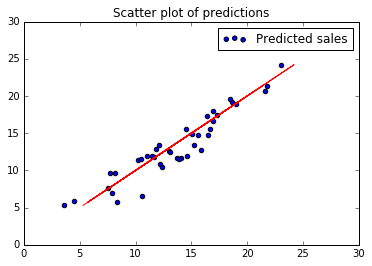

In [22]:
plt.title('Scatter plot of predictions')
p1 = plt.scatter(pred,ytest)
p2 = plt.plot(ytest,ytest,'r')
plt.legend([p1 , p2], ["Predicted sales","Real sales"])

The model looks correct since the predicted values are close to the real values. However, we can suppose by observing the data that a non-linear model can fit even better the data.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [14]:
print('Coefficients: \n'), regr.coef_

Coefficients: 
[ 0.04635947  0.18537178  0.00220545]


According to the coefficients the feature with the most significant impact is "Dollars spent on Radio". 
However, before making any conclusion we have to verify that the features are normalized.

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

From g) we can conclude that the feature with the most significan impact is "Dollars spent on Radio" and the feature with the less significant impact is "Dollars spent on Newspaper". However, as metioned before, we have to verify that the features are normalized.
Moreover, to measure the importance of the features we should have used a regularization term.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

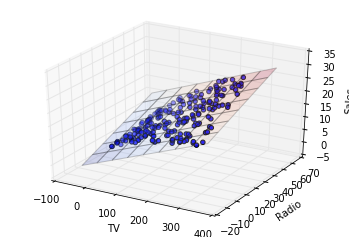

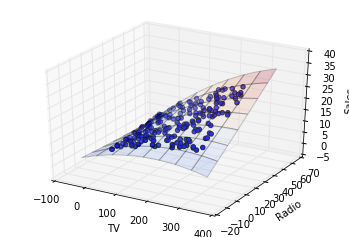

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import scipy.linalg

#Linear fit #################################################################################################

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[X.columns[0]]
ys = X[X.columns[1]]
zs = X[X.columns[2]]

ax.scatter(xs,ys,y)
plt.xlabel('TV')
plt.ylabel('Radio')
ax.set_zlabel('Sales')

A = np.c_[xs, ys, np.ones(y.shape)]
C,_,_,_ = scipy.linalg.lstsq(A, y)    # coefficients

Xt,Yt = np.meshgrid(np.arange(-50.0, 350.0, 1), np.arange(-10.0, 60.0, 1))
XX = Xt.flatten()
YY = Yt.flatten()

Z = C[0]*Xt + C[1]*Yt + C[2]

ax.plot_surface(Xt, Yt, Z, rstride=10, cstride=50, alpha=0.2, cmap=cm.coolwarm)


#Non-linear fit #################################################################################################

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs,ys,y)
plt.xlabel('TV')
plt.ylabel('Radio')
ax.set_zlabel('Sales')

A = np.c_[xs, ys, np.multiply(xs,ys), xs**2 , ys**2, np.ones(y.shape)]
C,_,_,_ = scipy.linalg.lstsq(A, y)
    
# evaluate it on a grid
Z = C[0]*Xt + C[1]*Yt + C[2]*Xt*Yt + C[3]*Xt*Xt + C[4]*Yt*Yt +C[5]

ax.plot_surface(Xt, Yt, Z, rstride=10, cstride=50, alpha=0.2, cmap=cm.coolwarm)

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0350749705923, m = 1.47880271753, error = 112.647056643


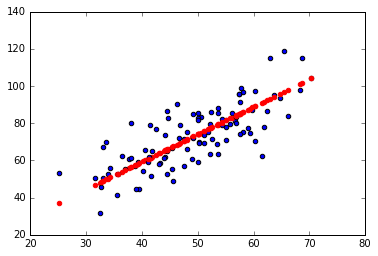

In [16]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

In [17]:
# Use this to visually discuss convergence rate based on learning rate

# for num in range(0,10):
#    run(num)
#    plt.show()


If we choose a very small learning rate we are going to be sure that our algorithm is going to converge however it is going to take more time to converge since it will need more steps to arrve to the minimum. On the other hand, if we choose a big learning rate, we may avoid the minimum leading to a divergent solution.

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

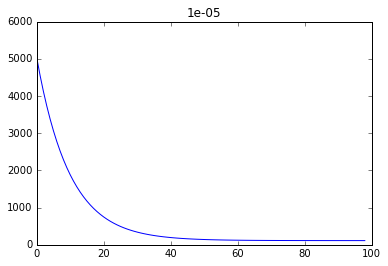

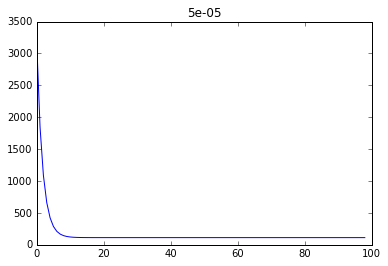

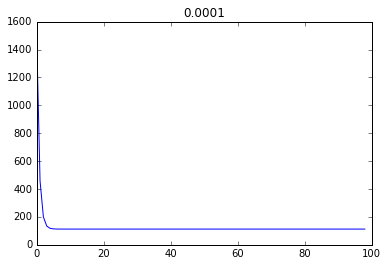

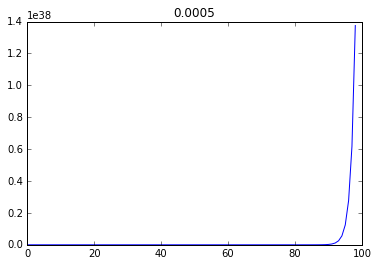

In [18]:

lr = [0.00001 , 0.00005 , 0.0001 , 0.0005]

for j in lr:
    v_error = []
    for i in range(1,100):
        points = genfromtxt("../data/data.csv", delimiter=",")
        learning_rate = j
        initial_b = 0 # initial y-intercept guess
        initial_m = 0 # initial slope guess
        num_iterations = i
        [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
        v_error.append(compute_error_for_line_given_points(b, m, points))
    
    plt.figure()
    plt.plot(v_error)
    plt.title(j)